<a href="https://colab.research.google.com/github/ReVuz/Machine_Learning/blob/main/CL_Lab_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement a simple rule-based Text tokenizer for the English language using regular expressions. Your tokenizer should consider punctuations and special symbols as separate tokens. Contractions like "isn't" should be regarded as 2 tokens - "is" and "n't". Also identify abbreviations (eg, U.S.A) and internal hyphenation (eg. ice-cream), as single tokens.**

In [1]:
import re

In [2]:
def tokenize_text(text):
    """
    Tokenizes English text using regular expressions.

    Args:
        text: The input text string.

    Returns:
        A list of tokens.
    """

    # Regular expression pattern for tokenization
    pattern = r"""
        (?:\w+-\w+)| # Hyphenated words (e.g., ice-cream)
        (?:[A-Z]\.)+ # Abbreviations (e.g., U.S.A.)
        (?:n't)| # Contraction "n't"  (Handle separately)
        (?:\w+)| # Regular words
        (?:[^\w\s]) # Punctuation and special characters
    """


    tokens = []
    for match in re.findall(pattern, text, re.VERBOSE):
        if match.endswith("n't"): # Handle "n't" contractions
           tokens.append(match[:-3])  # Add the base word (e.g., "is")
           tokens.append("n't")  # Add "n't"

        elif match:  # For regular matches
           tokens.append(match)
    return tokens


# Example usage
text = "Hello, world! This isn't an example. U.S.A. is an abbreviation. Let's eat some ice-cream."
tokens = tokenize_text(text)
print(tokens)



text2 = "Isn't it wonderful? We're having a great time at the ice-cream parlour with Dr. Seuss."
tokens2 = tokenize_text(text2)
print(tokens2)

# Example with multiple contractions and hyphenation:
text3 = "They couldn't believe they'd found a state-of-the-art ice-cream maker on sale."
tokens3 = tokenize_text(text3)
print(tokens3)


text4 = "This high-tech state-of-the-art gadget couldn't be found anywhere else!"
tokens4 = tokenize_text(text4)
print(tokens4)

['Hello', ',', 'world', '!', 'This', 'isn', "'", 't', 'an', 'example', '.', 'U', '.', 'S', '.', 'A', '.', 'is', 'an', 'abbreviation', '.', 'Let', "'", 's', 'eat', 'some', 'ice-cream', '.']
['Isn', "'", 't', 'it', 'wonderful', '?', 'We', "'", 're', 'having', 'a', 'great', 'time', 'at', 'the', 'ice-cream', 'parlour', 'with', 'Dr', '.', 'Seuss', '.']
['They', 'couldn', "'", 't', 'believe', 'they', "'", 'd', 'found', 'a', 'state-of', '-', 'the-art', 'ice-cream', 'maker', 'on', 'sale', '.']
['This', 'high-tech', 'state-of', '-', 'the-art', 'gadget', 'couldn', "'", 't', 'be', 'found', 'anywhere', 'else', '!']


**Design and implement a Finite State Automata(FSA) that accepts English plural nouns ending with the character  ‘y’, e.g. boys, toys, ponies, skies, and puppies but not boies or toies or ponys. (Hint: Words that end with a vowel followed by ‘y’ are appended with ‘s' and will not be replaced with “ies” in their plural form).**

In [1]:
class PluralFSA:
    def __init__(self):
        # Define vowels for checking
        self.vowels = set('aeiou')

        # Define states
        self.START = 'START'
        self.BODY = 'BODY'
        self.AFTER_VOWEL = 'AFTER_VOWEL'
        self.AFTER_Y = 'AFTER_Y'
        self.AFTER_I = 'AFTER_I'
        self.AFTER_E = 'AFTER_E'
        self.AFTER_S = 'AFTER_S'
        self.REJECTED = 'REJECTED'

        # Current state
        self.current_state = self.START

        # Define transitions
        self.transitions = {
            self.START: self._handle_start,
            self.BODY: self._handle_body,
            self.AFTER_VOWEL: self._handle_after_vowel,
            self.AFTER_Y: self._handle_after_y,
            self.AFTER_I: self._handle_after_i,
            self.AFTER_E: self._handle_after_e,
            self.AFTER_S: self._handle_after_s,
            self.REJECTED: self._handle_rejected
        }

    def _handle_start(self, char):
        if char.isalpha():
            if char in self.vowels:
                return self.AFTER_VOWEL
            return self.BODY
        return self.REJECTED

    def _handle_body(self, char):
        if char.isalpha():
            if char in self.vowels:
                return self.AFTER_VOWEL
            elif char == 'y':
                return self.AFTER_Y
            return self.BODY
        return self.REJECTED

    def _handle_after_vowel(self, char):
        if char.isalpha():
            if char == 'y':
                return self.AFTER_Y
            if char in self.vowels:
                return self.AFTER_VOWEL
            return self.BODY
        return self.REJECTED

    def _handle_after_y(self, char):
        if char == 's':
            return self.AFTER_S
        elif char == 'i':
            return self.AFTER_I
        return self.REJECTED

    def _handle_after_i(self, char):
        if char == 'e':
            return self.AFTER_E
        return self.REJECTED

    def _handle_after_e(self, char):
        if char == 's':
            return self.AFTER_S
        return self.REJECTED

    def _handle_after_s(self, char):
        return self.REJECTED

    def _handle_rejected(self, char):
        return self.REJECTED

    def process(self, word):
        self.current_state = self.START

        for char in word.lower():
            handler = self.transitions[self.current_state]
            self.current_state = handler(char)

            if self.current_state == self.REJECTED:
                return False

        # Accept only if we end in AFTER_S state
        return self.current_state == self.AFTER_S

    def test_words(self, words):
        results = []
        for word in words:
            is_valid = self.process(word)
            results.append(f"{word}: {'Valid' if is_valid else 'Invalid'}")
        return results

# Example usage
def main():
    fsa = PluralFSA()
    test_words = ['boys', 'toys', 'ponies', 'skies', 'puppies', 'boies', 'toies', 'ponys']

    print("Testing plural nouns:")
    for result in fsa.test_words(test_words):
        print(result)

if __name__ == "__main__":
    main()

Testing plural nouns:
boys: Valid
toys: Valid
ponies: Invalid
skies: Invalid
puppies: Invalid
boies: Invalid
toies: Invalid
ponys: Valid


**Design and implement a Finite State Transducer(FST) that accepts lexical forms of English words(e.g. shown below) and generates its corresponding plurals, based on the e-insertion spelling rule є => e / {x,s,z}^ __ s#
^ is the morpheme boundary and # - word boundary**
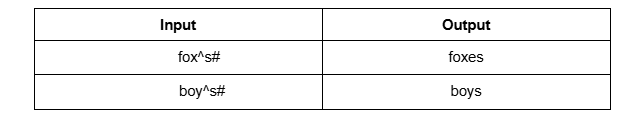

In [9]:
class FiniteStateTransducer:
    def __init__(self):
        self.final_output = ""

    def pluralize(self, word):
        # Define the e-insertion rule
        if word.endswith(('x^s#', 's^s#', 'z^s#')):
            # Apply the e-insertion rule for endings x, s, or z
            self.final_output = word.replace('^s#', 'es')
        elif word.endswith('^s#'):
            # Regular pluralization without e-insertion
            self.final_output = word.replace('^s#', 's')
        else:
            # If format is unexpected, return the original word
            self.final_output = word

        return self.final_output

# Example usage
fst = FiniteStateTransducer()

# Test cases
words = ["fox^s#", "boy^s#", "bus^s#", "quiz^s#"]
for word in words:
    plural = fst.pluralize(word)
    print(f"Input: {word} => Output: {plural}")


Input: fox^s# => Output: foxes
Input: boy^s# => Output: boys
Input: bus^s# => Output: buses
Input: quiz^s# => Output: quizes


**Implement the Minimum Edit Distance algorithm to find the edit distance between any two given strings. Also, list the edit operations.**

In [4]:
def min_edit_distance(source, target):
    # Initialize DP table
    m, n = len(source), len(target)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill in base cases
    for i in range(m + 1):
        dp[i][0] = i  # Cost of deletions
    for j in range(n + 1):
        dp[0][j] = j  # Cost of insertions

    # Fill the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if source[i - 1] == target[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  # No change needed
            else:
                dp[i][j] = min(dp[i - 1][j] + 1,      # Deletion
                               dp[i][j - 1] + 1,      # Insertion
                               dp[i - 1][j - 1] + 1)  # Replacement

    # Backtrack to find operations
    operations = []
    i, j = m, n
    while i > 0 or j > 0:
        if i > 0 and j > 0 and source[i - 1] == target[j - 1]:
            # No operation needed if characters are the same
            i, j = i - 1, j - 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + 1:
            # Deletion
            operations.append(f"Delete '{source[i - 1]}' from position {i - 1}")
            i -= 1
        elif j > 0 and dp[i][j] == dp[i][j - 1] + 1:
            # Insertion
            operations.append(f"Insert '{target[j - 1]}' at position {i}")
            j -= 1
        elif i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + 1:
            # Replacement
            operations.append(f"Replace '{source[i - 1]}' at position {i - 1} with '{target[j - 1]}'")
            i, j = i - 1, j - 1

    # The DP table's final entry contains the minimum edit distance
    edit_distance = dp[m][n]
    operations.reverse()  # Reverse to get operations in the correct order
    return edit_distance, operations

# Example usage
source = "kitten"
target = "sitting"
distance, operations = min_edit_distance(source, target)
print("Minimum Edit Distance:", distance)
print("Operations:")
for op in operations:
    print(op)


Minimum Edit Distance: 3
Operations:
Replace 'k' at position 0 with 's'
Replace 'e' at position 4 with 'i'
Insert 'g' at position 6



**Design and implement a statistical spell checker for detecting and correcting non-word spelling errors in English, using the bigram language model. Your program should do the following:**

**a. Tokenize the corpus and create a vocabulary of unique words.**

**b. Create a bi-gram frequency table for all possible bigrams in the corpus.**

**c. Scan the given input text to identify the non-word spelling errors.**

**d. Generate the candidate list using 1 edit distance from the misspelled words.**

**e. Suggest the best candidate word by calculating the probability of the given sentence using the bigram LM.**

In [2]:
import re
from collections import defaultdict, Counter
from typing import List, Set, Dict, Tuple

class BigramSpellChecker:
    def __init__(self):
        self.vocab: Set[str] = set()
        self.unigram_counts: Dict[str, int] = defaultdict(int)
        self.bigram_counts: Dict[Tuple[str, str], int] = defaultdict(int)
        self.total_words = 0

    def train(self, corpus: str) -> None:
        """
        Train the model on the given corpus.
        """
        # Tokenize and clean the corpus
        words = self._tokenize(corpus.lower())
        self.total_words = len(words)

        # Build vocabulary and unigram counts
        self.vocab = set(words)
        self.unigram_counts = Counter(words)

        # Build bigram counts
        for i in range(len(words) - 1):
            bigram = (words[i], words[i + 1])
            self.bigram_counts[bigram] += 1

    def _tokenize(self, text: str) -> List[str]:
        """
        Tokenize text into words.
        """
        return re.findall(r'\b\w+\b', text.lower())

    def _generate_candidates(self, word: str) -> Set[str]:
        """
        Generate candidates with edit distance 1 from the given word.
        """
        letters = 'abcdefghijklmnopqrstuvwxyz'
        splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]

        # Deletions
        deletes = [L + R[1:] for L, R in splits if R]

        # Transpositions
        transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]

        # Replacements
        replaces = [L + c + R[1:] for L, R in splits if R for c in letters]

        # Insertions
        inserts = [L + c + R for L, R in splits for c in letters]

        # Combine all candidates and filter only known words
        candidates = set(deletes + transposes + replaces + inserts)
        return {word for word in candidates if word in self.vocab}

    def _calculate_bigram_probability(self, sentence: List[str]) -> float:
        """
        Calculate the probability of a sentence using bigram model.
        """
        if len(sentence) < 2:
            return 0.0

        prob = 1.0
        for i in range(len(sentence) - 1):
            bigram = (sentence[i], sentence[i + 1])
            # Using Laplace smoothing
            numerator = self.bigram_counts[bigram] + 1
            denominator = self.unigram_counts[sentence[i]] + len(self.vocab)
            prob *= numerator / denominator

        return prob

    def correct_text(self, text: str) -> Tuple[str, Dict[str, List[str]]]:
        """
        Correct spelling errors in the given text.
        Returns corrected text and dictionary of corrections made.
        """
        words = self._tokenize(text)
        corrections = {}
        corrected_words = []

        for i, word in enumerate(words):
            if word not in self.vocab:
                candidates = self._generate_candidates(word)
                if not candidates:
                    corrected_words.append(word)
                    continue

                # Create context for probability calculation
                context = words[max(0, i-1):min(len(words), i+2)]
                best_prob = float('-inf')
                best_candidate = word

                for candidate in candidates:
                    # Replace the word with candidate in context
                    test_context = context.copy()
                    test_context[context.index(word)] = candidate
                    prob = self._calculate_bigram_probability(test_context)

                    if prob > best_prob:
                        best_prob = prob
                        best_candidate = candidate

                corrections[word] = [best_candidate] + list(candidates - {best_candidate})
                corrected_words.append(best_candidate)
            else:
                corrected_words.append(word)

        return ' '.join(corrected_words), corrections

# Example usage
def main():
    # Sample training corpus
    training_corpus = """
    The quick brown fox jumps over the lazy dog.
    A quick brown dog jumps over the lazy fox.
    The lazy fox sleeps under the tree.
    """

    # Initialize and train the spell checker
    spell_checker = BigramSpellChecker()
    spell_checker.train(training_corpus)

    # Test text with spelling errors
    test_text = "The quik brwn fox jumpss ovr the lasy dog"

    # Correct the text
    corrected_text, corrections = spell_checker.correct_text(test_text)

    # Print results
    print("Original text:", test_text)
    print("Corrected text:", corrected_text)
    print("\nCorrections made:")
    for wrong, candidates in corrections.items():
        print(f"{wrong} -> {candidates}")

if __name__ == "__main__":
    main()

Original text: The quik brwn fox jumpss ovr the lasy dog
Corrected text: the quick brown fox jumps over the lazy dog

Corrections made:
quik -> ['quick']
brwn -> ['brown']
jumpss -> ['jumps']
ovr -> ['over']
lasy -> ['lazy']



**Implement a text classifier for sentiment analysis using the Naive Bayes theorem. Use Add-k smoothing to handle zero probabilities. Compare the performance of your classifier for k values 0.25, 0.75, and 1.**

In [10]:
import math

class NaiveBayesClassifier:
    def __init__(self, k=0.5):  # Default k value
        self.k = k
        self.vocab = set()
        self.class_counts = {}
        self.word_counts = {}


    def train(self, documents, labels):
        for doc, label in zip(documents, labels):
            self.class_counts[label] = self.class_counts.get(label, 0) + 1
            for word in doc.split():
                self.vocab.add(word)
                self.word_counts[(word, label)] = self.word_counts.get((word, label), 0) + 1

    def predict(self, document):
        probabilities = {}
        for label in self.class_counts:
            prob_label = math.log(self.class_counts[label] / sum(self.class_counts.values()))
            prob_words_given_label = 0
            for word in document.split():
                count = self.word_counts.get((word, label), 0)
                prob_word_given_label = math.log((count + self.k) / (sum(self.word_counts.get((w,label),0) for w in self.vocab) + self.k * len(self.vocab)))
                prob_words_given_label += prob_word_given_label

            probabilities[label] = prob_label + prob_words_given_label

        # Find label with highest probability
        best_label = max(probabilities, key=probabilities.get)
        return best_label

# Sample data (replace with your own dataset)
documents = [
    "This movie is great!",
    "I hated this film.",
    "Such a wonderful experience.",
    "Absolutely terrible.",
    "It was okay.",
    "I loved it!"
]
labels = ["positive", "negative", "positive", "negative", "neutral", "positive"]

#Test different k values
k_values = [0.25, 0.75, 1.0]

for k in k_values:
    classifier = NaiveBayesClassifier(k=k)
    classifier.train(documents, labels)

    test_documents = ["This movie is awesome!", "A terrible movie", "It was decent"]
    predictions = [classifier.predict(doc) for doc in test_documents]

    print(f"Results for k = {k}:")
    for doc, pred in zip(test_documents, predictions):
        print(f"Document: {doc}, Predicted sentiment: {pred}")
    print("-" * 20)

Results for k = 0.25:
Document: This movie is awesome!, Predicted sentiment: positive
Document: A terrible movie, Predicted sentiment: positive
Document: It was decent, Predicted sentiment: neutral
--------------------
Results for k = 0.75:
Document: This movie is awesome!, Predicted sentiment: positive
Document: A terrible movie, Predicted sentiment: positive
Document: It was decent, Predicted sentiment: neutral
--------------------
Results for k = 1.0:
Document: This movie is awesome!, Predicted sentiment: positive
Document: A terrible movie, Predicted sentiment: positive
Document: It was decent, Predicted sentiment: neutral
--------------------


In [13]:
!pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [21]:
import math
from collections import Counter

class ImprovedNaiveBayesClassifier:
    def __init__(self, k=1.0):
        self.k = k
        self.vocab = set()
        self.class_counts = Counter()
        self.word_counts = {}
        self.word_counts_per_class = {}

    def preprocess(self, text):
        # Convert to lowercase and split
        return text.lower().split()

    def train(self, documents, labels):
        # Count class frequencies
        self.class_counts.update(labels)

        # Initialize word counts per class
        for label in self.class_counts:
            self.word_counts_per_class[label] = Counter()

        # Process documents
        for doc, label in zip(documents, labels):
            words = self.preprocess(doc)
            # Update vocabulary
            self.vocab.update(words)
            # Count word frequencies per class
            for word in words:
                self.word_counts[(word, label)] = self.word_counts.get((word, label), 0) + 1
                self.word_counts_per_class[label][word] += 1

    def predict(self, document):
        probabilities = {}
        total_docs = sum(self.class_counts.values())
        words = self.preprocess(document)

        for label in self.class_counts:
            # Prior probability (with smoothing)
            prob_label = math.log((self.class_counts[label] + self.k) / (total_docs + self.k * len(self.class_counts)))

            # Total words in this class (including duplicates)
            total_words_in_class = sum(self.word_counts_per_class[label].values())

            # Calculate word probabilities
            prob_words_given_label = 0
            for word in words:
                count = self.word_counts.get((word, label), 0)
                # Apply Laplace smoothing
                prob_word = (count + self.k) / (total_words_in_class + self.k * len(self.vocab))
                prob_words_given_label += math.log(prob_word) if prob_word > 0 else float('-inf')

            probabilities[label] = prob_label + prob_words_given_label

        # Return both best label and confidence scores
        best_label = max(probabilities, key=probabilities.get)
        # Convert log probabilities to regular probabilities and normalize
        exp_probs = {k: math.exp(v) for k, v in probabilities.items()}
        total = sum(exp_probs.values())
        confidence_scores = {k: v/total for k, v in exp_probs.items()}

        return best_label, confidence_scores

# Test data
documents = [
    "This movie is great!",
    "I hated this film.",
    "Such a wonderful experience.",
    "Absolutely terrible.",
    "It was okay.",
    "I loved it!",
    "Awful movie, waste of time.",
    "Brilliant performance!",
    "Not worth watching.",
    "Neither good nor bad."
]

labels = [
    "positive", "negative", "positive", "negative",
    "neutral", "positive", "negative", "positive",
    "negative", "neutral"
]

# Test the improved classifier
k_values = [0.5, 1.0, 2.0]
test_documents = [
    "This movie is awesome!",
    "A terrible movie",
    "It was decent",
    "Absolutely brilliant film",
    "Waste of time and money"
]

for k in k_values:
    print(f"\nResults for k = {k}:")
    classifier = ImprovedNaiveBayesClassifier(k=k)
    classifier.train(documents, labels)

    for doc in test_documents:
        prediction, confidence = classifier.predict(doc)
        confidence_str = ", ".join([f"{k}: {v:.2%}" for k, v in confidence.items()])
        print(f"Document: '{doc}'")
        print(f"Prediction: {prediction}")
        print(f"Confidence scores: {confidence_str}")
        print("-" * 50)


Results for k = 0.5:
Document: 'This movie is awesome!'
Prediction: positive
Confidence scores: positive: 87.03%, negative: 8.44%, neutral: 4.53%
--------------------------------------------------
Document: 'A terrible movie'
Prediction: positive
Confidence scores: positive: 81.69%, negative: 8.20%, neutral: 10.11%
--------------------------------------------------
Document: 'It was decent'
Prediction: neutral
Confidence scores: positive: 8.39%, negative: 7.57%, neutral: 84.04%
--------------------------------------------------
Document: 'Absolutely brilliant film'
Prediction: positive
Confidence scores: positive: 43.97%, negative: 39.71%, neutral: 16.32%
--------------------------------------------------
Document: 'Waste of time and money'
Prediction: negative
Confidence scores: positive: 9.65%, negative: 73.28%, neutral: 17.08%
--------------------------------------------------

Results for k = 1.0:
Document: 'This movie is awesome!'
Prediction: positive
Confidence scores: positive:

In [22]:
import math
from collections import Counter
from typing import List, Tuple, Dict, Set
import re

class EnhancedNaiveBayesClassifier:
    def __init__(self, k: float = 1.0, min_word_freq: int = 1):
        self.k = k  # Smoothing parameter
        self.min_word_freq = min_word_freq  # Minimum word frequency threshold
        self.vocab: Set[str] = set()
        self.class_counts = Counter()
        self.word_counts: Dict[Tuple[str, str], int] = {}
        self.word_counts_per_class: Dict[str, Counter] = {}
        self.total_words_per_class: Dict[str, int] = {}

    def preprocess(self, text: str) -> List[str]:
        # Convert to lowercase and remove special characters
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)

        # Split into words and remove stop words
        words = text.split()
        stop_words = {'a', 'an', 'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to'}
        words = [word for word in words if word not in stop_words]

        # Extract bigrams for better context
        bigrams = [f"{words[i]}_{words[i+1]}" for i in range(len(words)-1)]
        return words + bigrams

    def train(self, documents: List[str], labels: List[str]) -> None:
        # Count class frequencies
        self.class_counts.update(labels)

        # Initialize word counts per class
        for label in self.class_counts:
            self.word_counts_per_class[label] = Counter()

        # Process documents and collect word frequencies
        word_freq = Counter()
        for doc in documents:
            words = self.preprocess(doc)
            word_freq.update(words)

        # Process documents with frequency filtering
        for doc, label in zip(documents, labels):
            words = self.preprocess(doc)
            # Only include words that meet minimum frequency threshold
            words = [w for w in words if word_freq[w] >= self.min_word_freq]

            # Update vocabulary and counts
            self.vocab.update(words)
            for word in words:
                self.word_counts[(word, label)] = self.word_counts.get((word, label), 0) + 1
                self.word_counts_per_class[label][word] += 1

        # Calculate total words per class
        for label in self.class_counts:
            self.total_words_per_class[label] = sum(self.word_counts_per_class[label].values())

    def predict(self, document: str) -> Tuple[str, Dict[str, float]]:
        probabilities = {}
        total_docs = sum(self.class_counts.values())
        words = self.preprocess(document)

        # Filter words by minimum frequency
        words = [w for w in words if w in self.vocab]

        for label in self.class_counts:
            # Calculate prior probability with smoothing
            prob_label = math.log((self.class_counts[label] + self.k) /
                                (total_docs + self.k * len(self.class_counts)))

            # Calculate likelihood for each word
            prob_words_given_label = 0
            for word in words:
                count = self.word_counts.get((word, label), 0)
                # Apply Laplace smoothing
                prob_word = (count + self.k) / (self.total_words_per_class[label] +
                                              self.k * len(self.vocab))
                prob_words_given_label += math.log(prob_word) if prob_word > 0 else float('-inf')

            probabilities[label] = prob_label + prob_words_given_label

        # Convert log probabilities and normalize
        max_prob = max(probabilities.values())
        exp_probs = {k: math.exp(v - max_prob) for k, v in probabilities.items()}
        total = sum(exp_probs.values())
        confidence_scores = {k: v/total for k, v in exp_probs.items()}

        best_label = max(confidence_scores, key=confidence_scores.get)
        return best_label, confidence_scores

    def evaluate(self, test_documents: List[str], test_labels: List[str]) -> Dict[str, float]:
        """Evaluate classifier performance"""
        correct = 0
        total = len(test_documents)
        confusion_matrix = {label: {l: 0 for l in self.class_counts}
                          for label in self.class_counts}

        for doc, true_label in zip(test_documents, test_labels):
            pred_label, _ = self.predict(doc)
            if pred_label == true_label:
                correct += 1
            confusion_matrix[true_label][pred_label] += 1

        # Calculate metrics
        accuracy = correct / total
        metrics = {'accuracy': accuracy}

        # Calculate per-class metrics
        for label in self.class_counts:
            tp = confusion_matrix[label][label]
            fp = sum(confusion_matrix[l][label] for l in self.class_counts if l != label)
            fn = sum(confusion_matrix[label][l] for l in self.class_counts if l != label)

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            metrics[f'{label}_precision'] = precision
            metrics[f'{label}_recall'] = recall
            metrics[f'{label}_f1'] = f1

        return metrics

In [23]:
# Test the enhanced classifier
documents = [
    "This movie is great!",
    "I hated this film.",
    "Such a wonderful experience.",
    "Absolutely terrible.",
    "It was okay.",
    "I loved it!",
    "Awful movie, waste of time.",
    "Brilliant performance!",
    "Not worth watching.",
    "Neither good nor bad."
]
labels = [
    "positive", "negative", "positive", "negative",
    "neutral", "positive", "negative", "positive",
    "negative", "neutral"
]

classifier = EnhancedNaiveBayesClassifier(k=1.0, min_word_freq=1)
classifier.train(documents, labels)

# Test documents
test_docs = [
    "This movie is awesome!",
    "A terrible movie",
    "It was decent",
    "Absolutely brilliant film",
    "Waste of time and money"
]

for doc in test_docs:
    pred, conf = classifier.predict(doc)
    print(f"Document: '{doc}'")
    print(f"Prediction: {pred}")
    print(f"Confidence scores:", {k: f"{v:.2%}" for k, v in conf.items()})
    print("-" * 50)

Document: 'This movie is awesome!'
Prediction: positive
Confidence scores: {'positive': '88.56%', 'negative': '8.45%', 'neutral': '2.99%'}
--------------------------------------------------
Document: 'A terrible movie'
Prediction: negative
Confidence scores: {'positive': '31.50%', 'negative': '56.54%', 'neutral': '11.96%'}
--------------------------------------------------
Document: 'It was decent'
Prediction: neutral
Confidence scores: {'positive': '20.65%', 'negative': '8.78%', 'neutral': '70.57%'}
--------------------------------------------------
Document: 'Absolutely brilliant film'
Prediction: negative
Confidence scores: {'positive': '31.97%', 'negative': '54.37%', 'neutral': '13.66%'}
--------------------------------------------------
Document: 'Waste of time and money'
Prediction: negative
Confidence scores: {'positive': '3.77%', 'negative': '92.15%', 'neutral': '4.08%'}
--------------------------------------------------


**Implement the Viterbi algorithm to find the most probable POS tag sequence for a given sentence, using the given probabilities:**

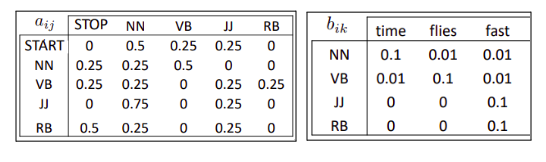